In [2]:
from intake import open_catalog
import datetime
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import scipy.io
import gsw
import gcsfs
import xarray as xr
import rclv
from copy import deepcopy
from skimage import measure
from matplotlib import pyplot as plt
import pickle
import gcsfs

%matplotlib inline

In [3]:
gcs = gcsfs.GCSFileSystem(requester_pays=True)

year = 1993
mon = 1

timestr = str(year) + '-' + str(mon).zfill(2) + '-01'
namestr = 'gs://pangeo-rclv-eddies/float_trajectories/' + timestr + '.zarr'
print(namestr)

ds = xr.open_zarr(gcs.get_mapper(namestr))

xx0 = 100; xx1 = 125;
yy0 = 0; yy1 = 25;

ds_new = ds.sel(x0=slice(xx0, xx1), y0=slice(yy0, yy1))

gs://pangeo-rclv-eddies/float_trajectories/1993-01-01.zarr


In [4]:
diff_abs_x = np.load('diff_abs_x.npy')
diff_abs_y = np.load('diff_abs_y.npy')

diff_rel_x = np.load('diff_rel_x.npy')
diff_rel_y = np.load('diff_rel_y.npy')

In [5]:
#diff_abs_x = np.load('diff_abs_x.npy')
#diff_abs_y = np.load('diff_abs_y.npy')

diff_rel_x_rclv = np.load('diff_rel_x_rclv.npy')
diff_rel_y_rclv = np.load('diff_rel_y_rclv.npy')

In [19]:
plt.rcParams.update({'font.size': 14
    , 'legend.markerscale': 1., 'axes.titlesize': 14, 'axes.labelsize' : 14,
      'legend.fontsize' : 11,'legend.handlelength': 2})

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

Text(0, 0.5, 'Percentage')

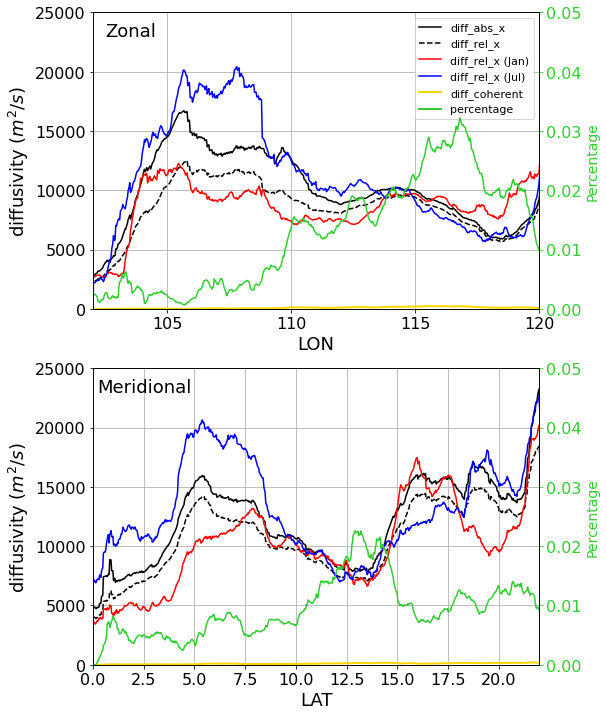

In [20]:
fig = plt.figure(figsize=(8, 12))

ax1 = plt.subplot(211)

plt.plot(ds_new.x0, np.mean(diff_abs_x, axis=1), color='k', label='diff_abs_x')
plt.plot(ds_new.x0, np.mean(diff_rel_x, axis=1), color='k', linestyle='--', label='diff_rel_x')
plt.plot(ds_new.x0, np.mean(diff_rel_x[:, 0::12], axis=1), color='r', label='diff_rel_x (Jan)')
plt.plot(ds_new.x0, np.mean(diff_rel_x[:, 6::12], axis=1), color='b', label='diff_rel_x (Jul)')

plt.plot(ds_new.x0, np.mean(diff_rel_x_rclv, axis=1), color='gold', label='diff_coherent', linewidth=2)
plt.plot(ds_new.y0, np.mean(diff_rel_y_rclv, axis=1), color='limegreen', label='percentage', linewidth=2)

plt.grid()
plt.xticks(np.arange(100, 121, 5))

plt.ylim(0, 25000)
plt.xlim(102, 120)
plt.xlabel('LON', size=18)
plt.ylabel(r'diffusivity ($m^2/s$)', size=18)
plt.text(102.5, 23000, 'Zonal', size=18)
plt.legend()

ax2 = ax1.twinx()
plt.plot(ds_new.x0, np.mean(diff_rel_x_rclv, axis=1) / np.mean(diff_rel_x, axis=1), color='limegreen')
plt.ylim(0, 0.05)
plt.tick_params(axis='y', colors='limegreen')
plt.ylabel('Percentage', color='limegreen')

ax3 = plt.subplot(212)

plt.plot(ds_new.y0, np.mean(diff_abs_y, axis=1), label='diff_abs_y', color='k')
plt.plot(ds_new.y0, np.mean(diff_rel_y, axis=1), label='diff_rel_y', color='k', linestyle='--')
plt.plot(ds_new.y0, np.mean(diff_rel_y[:, 0::12], axis=1), label='diff_rel_x (Jan)', color='r')
plt.plot(ds_new.y0, np.mean(diff_rel_y[:, 6::12], axis=1), label='diff_rel_x (Jul)', color='b')

plt.plot(ds_new.y0, np.mean(diff_rel_y_rclv, axis=1), color='gold', label='diff_coherent', linewidth=2)

plt.grid()
plt.ylim(0, 25000)
plt.xlim(0, 22, 5)

plt.xlabel('LAT', size=18)
plt.text(0.2, 23000, 'Meridional', size=18)
plt.ylabel(r'diffusivity ($m^2/s$)', size=18)

ax4 = ax3.twinx()
plt.plot(ds_new.y0, np.mean(diff_rel_y_rclv, axis=1) / np.mean(diff_rel_y, axis=1), color='limegreen')
plt.ylim(0, 0.05)
plt.tick_params(axis='y', colors='limegreen')
plt.ylabel('Percentage', color='limegreen')